<a href="https://colab.research.google.com/github/olsonjl1986/university-of--austin-texas/blob/main/Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project outline

>- 1) import libraries
>- 2) Define Project
>- 3) Import Data, get basic statistics, shape of data, sum of missing vaules, and variable types
>- 4) Preprocessing the data for the models
>- 5) EDA
>- 6) Transform data if needed
>- 7) Define functions for model analyis 
    - plot dendograms
    - plot elbow method graph
>- 8) Define feature matrices & Split model into testing and training data
>- 9) Instantiate model, fit and score base models, then compare each one with dataframe
>- 10) Hypertune models 
>- 11) Conclusion and business insight.

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Removes the limit from the number of displayed columns
pd.set_option("display.max_columns", None)
# Changes the limit of number of displayed rows to 200
pd.set_option("display.max_rows", 200)

%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
# import sklearn.metrics


from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()
from sklearn.preprocessing import StandardScaler
data = pd.read_excel(io.BytesIO(uploaded['Credit Card Customer Data.xlsx']))
# for Jupyter Notebook IDE, the previous code lines can be commented out
# and only the next line can be uncommented and run
#data = pd.read_csv("auto-mpg.csv")
data.shape

(660, 7)

### Data Dict

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [9]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [15]:
# drop the  Sl_no and customer key column as this will add no value to the cluster analysis
data = bdata.drop(["Sl_No","Customer Key"], axis = 1)
data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


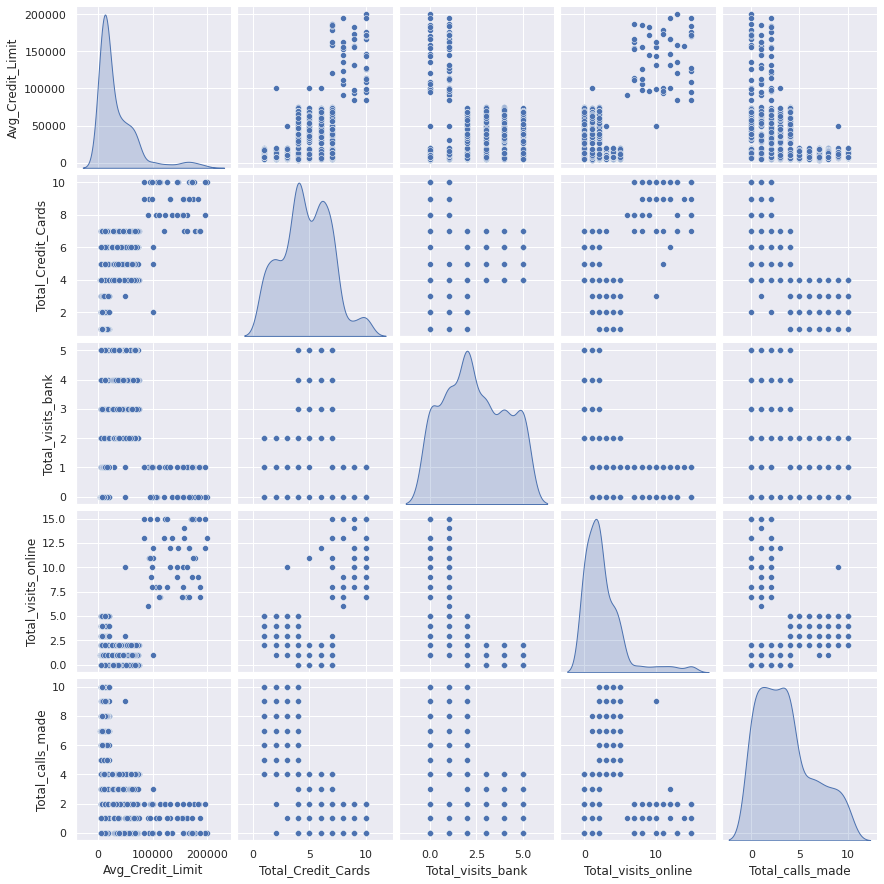

In [16]:
sns.pairplot(data,diag_kind = 'kde')

In [ ]:
# check for missing values

In [47]:
  print(100*(data['Avg_Credit_Limit'].isnull().sum()/len(data['Avg_Credit_Limit'])))
  print(data["Avg_Credit_Limit"].name)
  print("-"*60)

0.0
Avg_Credit_Limit
------------------------------------------------------------


In [46]:
for col in cat_list:
    
    print(100*(data[col].isnull().sum()/len(data[col])))
    print(data[col].name)
    print("-"*60)

0.0
Total_Credit_Cards
------------------------------------------------------------
0.0
Total_visits_bank
------------------------------------------------------------
0.0
Total_visits_online
------------------------------------------------------------
0.0
Total_calls_made
------------------------------------------------------------


In [17]:
# make copies of original dataset to remove and not remove outliers

out_data = data.copy()
tmp_data = data.copy()

In [21]:
cat_list = list(tmp_data.columns)
cat_list.remove("Avg_Credit_Limit")

In [22]:
# define categorical column list. 

cat_list

['Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [23]:
### 3) Univariate analysis

In [24]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="PuBu",
        order=data[feature].value_counts(ascending=True).index[:n],
        hue = None
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

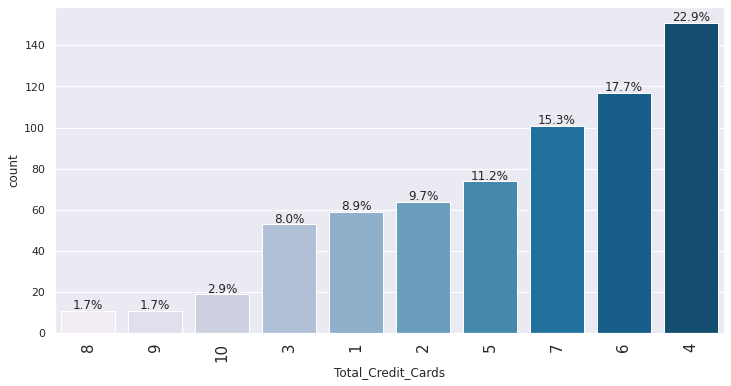

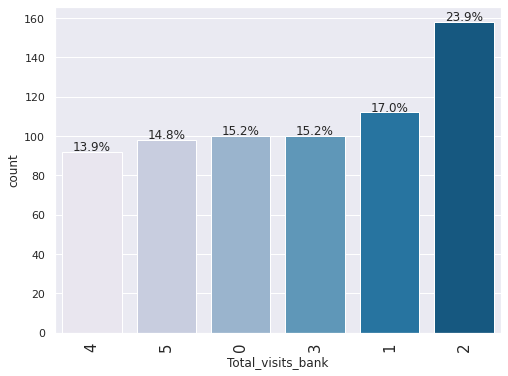

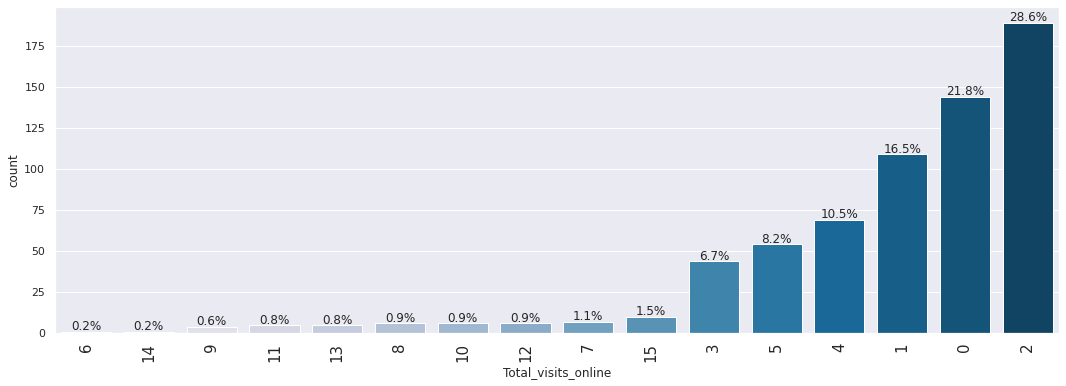

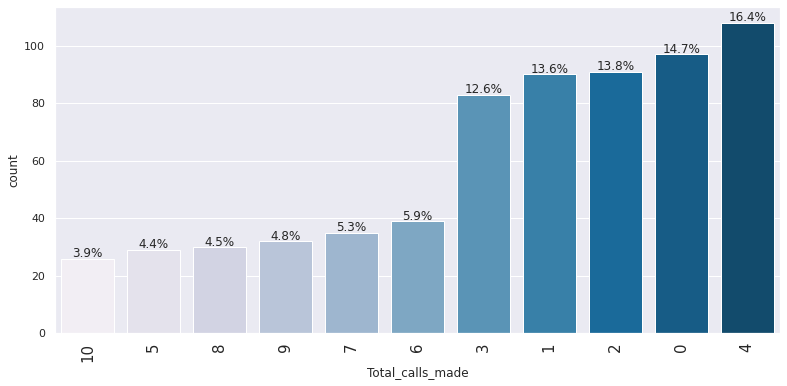

In [25]:
for feature in cat_list:
  labeled_barplot(tmp_data, feature, perc=True)

In [26]:
### Define function for stacked barplots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    
    )
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [32]:
cat_list

['Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

Total_Credit_Cards   1   2   3    4   5    6    7   8   9  10  All
Total_Credit_Cards                                                
8                    0   0   0    0   0    0    0  11   0   0   11
All                 59  64  53  151  74  117  101  11  11  19  660
1                   59   0   0    0   0    0    0   0   0   0   59
2                    0  64   0    0   0    0    0   0   0   0   64
3                    0   0  53    0   0    0    0   0   0   0   53
4                    0   0   0  151   0    0    0   0   0   0  151
5                    0   0   0    0  74    0    0   0   0   0   74
6                    0   0   0    0   0  117    0   0   0   0  117
7                    0   0   0    0   0    0  101   0   0   0  101
9                    0   0   0    0   0    0    0   0  11   0   11
10                   0   0   0    0   0    0    0   0   0  19   19
------------------------------------------------------------------------------------------------------------------------


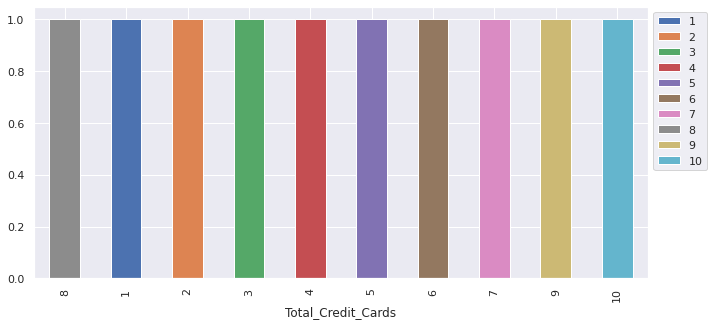

Total_Credit_Cards   1   2   3    4   5    6    7   8   9  10  All
Total_visits_bank                                                 
All                 59  64  53  151  74  117  101  11  11  19  660
1                   21  19  18   22   1    0    4   7   8  12  112
0                   21  25  21   13   1    1    4   4   3   7  100
2                   17  20  14   35  24   24   24   0   0   0  158
3                    0   0   0   26  15   34   25   0   0   0  100
4                    0   0   0   27  18   24   23   0   0   0   92
5                    0   0   0   28  15   34   21   0   0   0   98
------------------------------------------------------------------------------------------------------------------------


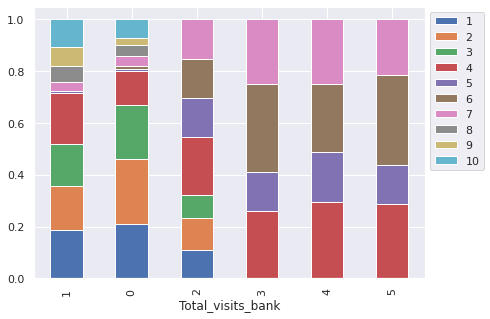

Total_Credit_Cards    1   2   3    4   5    6    7   8   9  10  All
Total_visits_online                                                
All                  59  64  53  151  74  117  101  11  11  19  660
7                     0   0   0    0   0    0    1   4   0   2    7
15                    0   0   0    0   0    0    1   2   1   6   10
8                     0   0   0    0   0    0    1   2   1   2    6
6                     0   0   0    0   0    0    0   1   0   0    1
9                     0   0   0    0   0    0    0   1   1   2    4
13                    0   0   0    0   0    0    2   1   0   2    5
4                    17  18  14   20   0    0    0   0   0   0   69
5                    15  16  16    7   0    0    0   0   0   0   54
3                     9  15   8   11   0    0    1   0   0   0   44
1                     0   1   2   25  23   38   20   0   0   0  109
10                    0   0   1    0   0    0    1   0   2   2    6
11                    0   0   0    0   1    0   

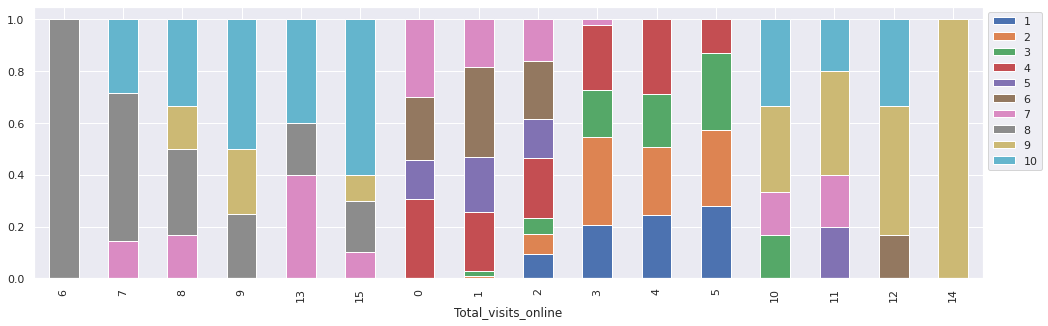

Total_Credit_Cards   1   2   3    4   5    6    7   8   9  10  All
Total_calls_made                                                  
All                 59  64  53  151  74  117  101  11  11  19  660
1                    0   0   1   22  14   22   18   5   2   6   90
0                    0   1   0   23  13   27   20   4   3   6   97
2                    0   1   0   21  15   20   19   2   6   7   91
3                    0   0   0   19  14   30   20   0   0   0   83
4                    6  12   7   23  18   18   24   0   0   0  108
5                    8   7   8    6   0    0    0   0   0   0   29
6                    7  11  13    8   0    0    0   0   0   0   39
7                   12   8   6    9   0    0    0   0   0   0   35
8                    7  12   4    7   0    0    0   0   0   0   30
9                   10   6   9    7   0    0    0   0   0   0   32
10                   9   6   5    6   0    0    0   0   0   0   26
--------------------------------------------------------------

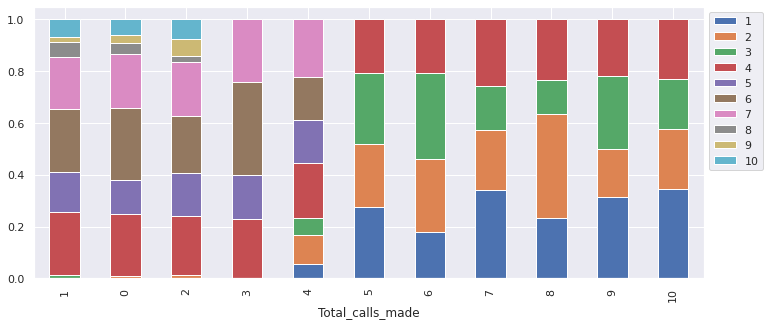

In [33]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Total_Credit_Cards")

Total_visits_bank     0    1    2    3   4   5  All
Total_Credit_Cards                                 
All                 100  112  158  100  92  98  660
4                    13   22   35   26  27  28  151
6                     1    0   24   34  24  34  117
7                     4    4   24   25  23  21  101
5                     1    1   24   15  18  15   74
1                    21   21   17    0   0   0   59
2                    25   19   20    0   0   0   64
3                    21   18   14    0   0   0   53
8                     4    7    0    0   0   0   11
9                     3    8    0    0   0   0   11
10                    7   12    0    0   0   0   19
------------------------------------------------------------------------------------------------------------------------


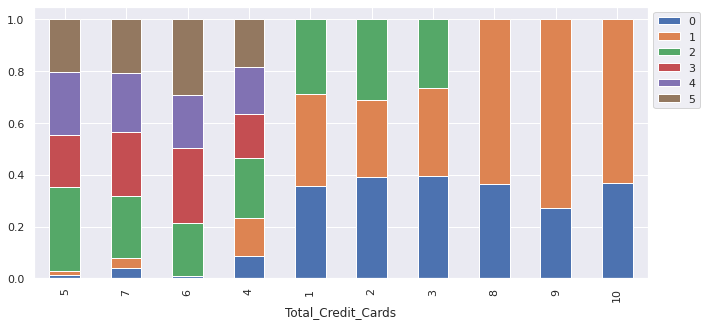

Total_visits_bank    0    1    2    3   4   5  All
Total_visits_bank                                 
4                    0    0    0    0  92   0   92
All                100  112  158  100  92  98  660
0                  100    0    0    0   0   0  100
1                    0  112    0    0   0   0  112
2                    0    0  158    0   0   0  158
3                    0    0    0  100   0   0  100
5                    0    0    0    0   0  98   98
------------------------------------------------------------------------------------------------------------------------


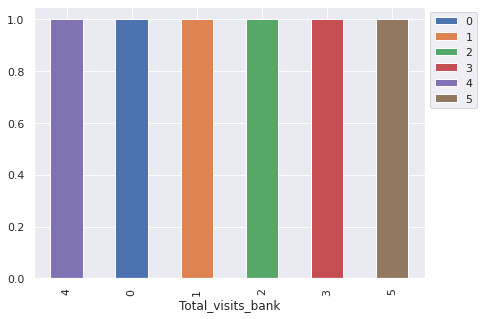

Total_visits_bank      0    1    2    3   4   5  All
Total_visits_online                                 
All                  100  112  158  100  92  98  660
2                     20   15   45   35  38  36  189
0                      0    0   40   32  31  41  144
1                      3    2   27   33  23  21  109
3                     17   11   16    0   0   0   44
4                     23   30   16    0   0   0   69
5                     16   24   14    0   0   0   54
6                      0    1    0    0   0   0    1
7                      2    5    0    0   0   0    7
9                      1    3    0    0   0   0    4
10                     2    4    0    0   0   0    6
11                     2    3    0    0   0   0    5
12                     3    3    0    0   0   0    6
13                     4    1    0    0   0   0    5
14                     0    1    0    0   0   0    1
15                     4    6    0    0   0   0   10
8                      3    3    0    0   0   

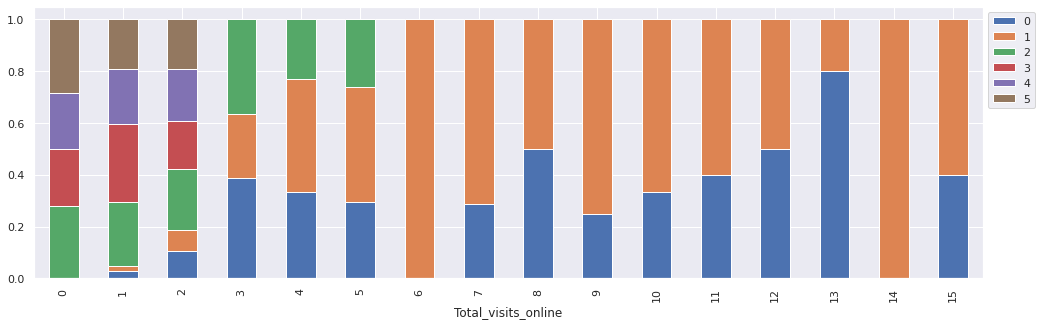

Total_visits_bank    0    1    2    3   4   5  All
Total_calls_made                                  
All                100  112  158  100  92  98  660
3                    1    0   18   21  23  20   83
0                    7   10   19   21  21  19   97
1                    6   10   14   19  19  22   90
2                    8   11   21   18  18  15   91
4                   10   15   29   21  11  22  108
5                   10   10    9    0   0   0   29
6                   10   14   15    0   0   0   39
7                   13   12   10    0   0   0   35
8                   11    9   10    0   0   0   30
9                   12   12    8    0   0   0   32
10                  12    9    5    0   0   0   26
------------------------------------------------------------------------------------------------------------------------


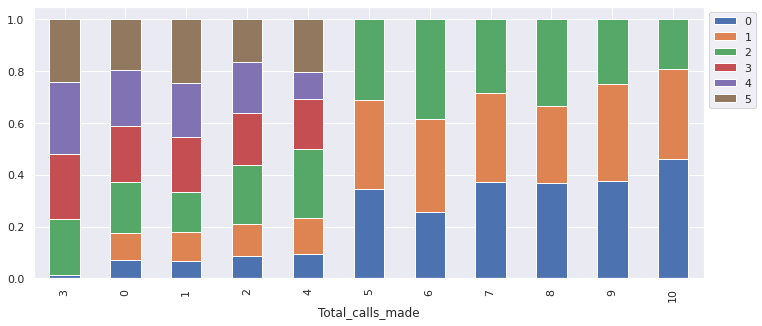

In [37]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Total_visits_bank")

Total_visits_online    0    1    2   3   4   5  6  7  8  9  10  11  12  13  \
Total_Credit_Cards                                                           
8                      0    0    0   0   0   0  1  4  2  1   0   0   0   1   
All                  144  109  189  44  69  54  1  7  6  4   6   5   6   5   
1                      0    0   18   9  17  15  0  0  0  0   0   0   0   0   
2                      0    1   14  15  18  16  0  0  0  0   0   0   0   0   
3                      0    2   12   8  14  16  0  0  0  0   1   0   0   0   
4                     44   25   44  11  20   7  0  0  0  0   0   0   0   0   
5                     22   23   28   0   0   0  0  0  0  0   0   1   0   0   
6                     35   38   43   0   0   0  0  0  0  0   0   0   1   0   
7                     43   20   30   1   0   0  0  1  1  0   1   1   0   2   
9                      0    0    0   0   0   0  0  0  1  1   2   2   3   0   
10                     0    0    0   0   0   0  0  2  2  2   2  

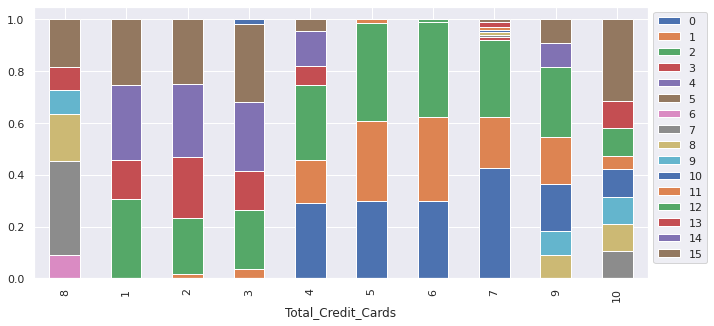

Total_visits_online    0    1    2   3   4   5  6  7  8  9  10  11  12  13  \
Total_visits_bank                                                            
1                      0    2   15  11  30  24  1  5  3  3   4   3   3   1   
All                  144  109  189  44  69  54  1  7  6  4   6   5   6   5   
0                      0    3   20  17  23  16  0  2  3  1   2   2   3   4   
2                     40   27   45  16  16  14  0  0  0  0   0   0   0   0   
3                     32   33   35   0   0   0  0  0  0  0   0   0   0   0   
4                     31   23   38   0   0   0  0  0  0  0   0   0   0   0   
5                     41   21   36   0   0   0  0  0  0  0   0   0   0   0   

Total_visits_online  14  15  All  
Total_visits_bank                 
1                     1   6  112  
All                   1  10  660  
0                     0   4  100  
2                     0   0  158  
3                     0   0  100  
4                     0   0   92  
5                

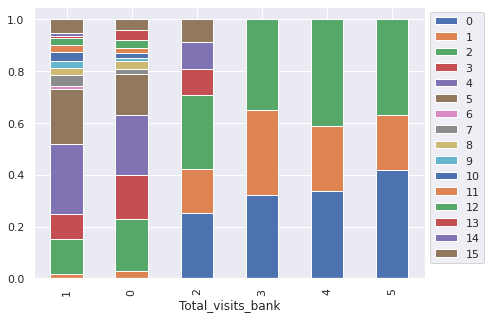

Total_visits_online    0    1    2   3   4   5  6  7  8  9  10  11  12  13  \
Total_visits_online                                                          
All                  144  109  189  44  69  54  1  7  6  4   6   5   6   5   
6                      0    0    0   0   0   0  1  0  0  0   0   0   0   0   
9                      0    0    0   0   0   0  0  0  0  4   0   0   0   0   
15                     0    0    0   0   0   0  0  0  0  0   0   0   0   0   
14                     0    0    0   0   0   0  0  0  0  0   0   0   0   0   
13                     0    0    0   0   0   0  0  0  0  0   0   0   0   5   
12                     0    0    0   0   0   0  0  0  0  0   0   0   6   0   
11                     0    0    0   0   0   0  0  0  0  0   0   5   0   0   
10                     0    0    0   0   0   0  0  0  0  0   6   0   0   0   
0                    144    0    0   0   0   0  0  0  0  0   0   0   0   0   
1                      0  109    0   0   0   0  0  0  0  0   0  

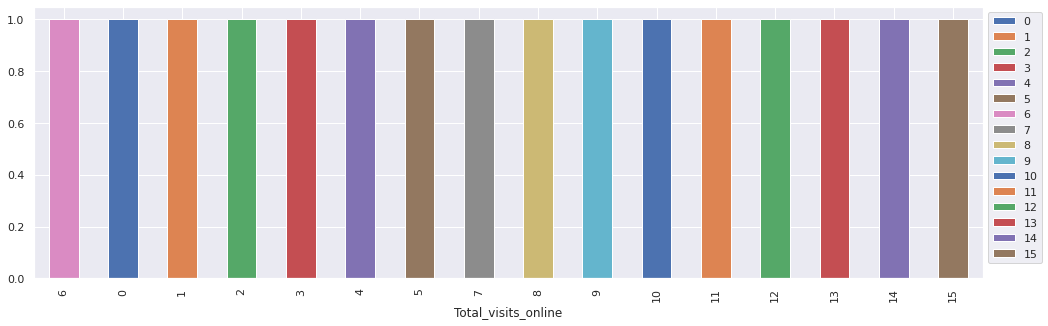

Total_visits_online    0    1    2   3   4   5  6  7  8  9  10  11  12  13  \
Total_calls_made                                                             
1                     26   16   33   0   0   0  1  2  3  2   2   0   1   0   
All                  144  109  189  44  69  54  1  7  6  4   6   5   6   5   
0                     30   30   21   0   0   0  0  3  2  0   1   3   0   3   
2                     27   19   27   0   0   0  0  2  1  2   2   2   4   2   
3                     26   18   38   0   0   0  0  0  0  0   0   0   1   0   
4                     35   24   26   7  10   6  0  0  0  0   0   0   0   0   
5                      0    0    9   5   6   9  0  0  0  0   0   0   0   0   
6                      0    0    9   7  15   8  0  0  0  0   0   0   0   0   
7                      0    1    9   9  10   6  0  0  0  0   0   0   0   0   
8                      0    1    5   5  10   9  0  0  0  0   0   0   0   0   
9                      0    0    4   3  13  11  0  0  0  0   1  

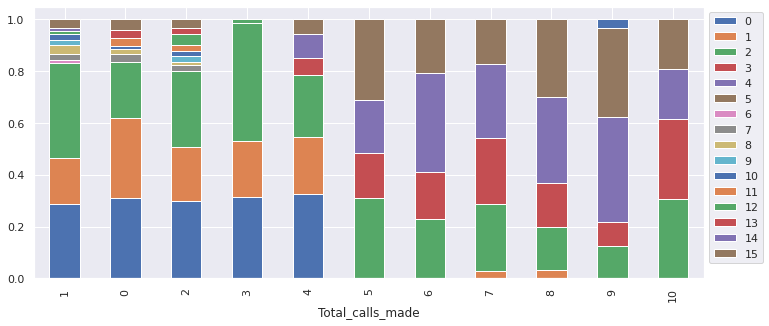

In [38]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Total_visits_online")

Total_calls_made     0   1   2   3    4   5   6   7   8   9  10  All
Total_Credit_Cards                                                  
All                 97  90  91  83  108  29  39  35  30  32  26  660
1                    0   0   0   0    6   8   7  12   7  10   9   59
2                    1   0   1   0   12   7  11   8  12   6   6   64
4                   23  22  21  19   23   6   8   9   7   7   6  151
3                    0   1   0   0    7   8  13   6   4   9   5   53
5                   13  14  15  14   18   0   0   0   0   0   0   74
6                   27  22  20  30   18   0   0   0   0   0   0  117
7                   20  18  19  20   24   0   0   0   0   0   0  101
8                    4   5   2   0    0   0   0   0   0   0   0   11
9                    3   2   6   0    0   0   0   0   0   0   0   11
10                   6   6   7   0    0   0   0   0   0   0   0   19
-------------------------------------------------------------------------------------------------------

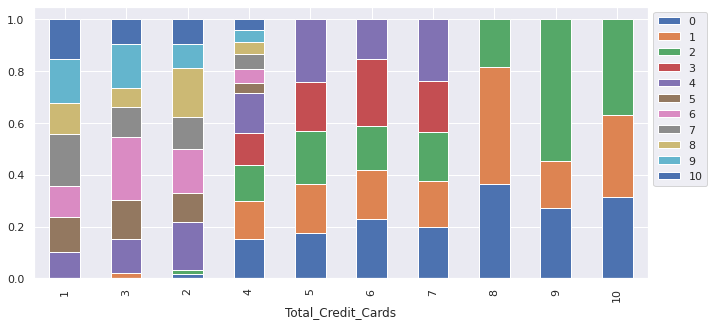

Total_calls_made    0   1   2   3    4   5   6   7   8   9  10  All
Total_visits_bank                                                  
All                97  90  91  83  108  29  39  35  30  32  26  660
0                   7   6   8   1   10  10  10  13  11  12  12  100
1                  10  10  11   0   15  10  14  12   9  12   9  112
2                  19  14  21  18   29   9  15  10  10   8   5  158
3                  21  19  18  21   21   0   0   0   0   0   0  100
4                  21  19  18  23   11   0   0   0   0   0   0   92
5                  19  22  15  20   22   0   0   0   0   0   0   98
------------------------------------------------------------------------------------------------------------------------


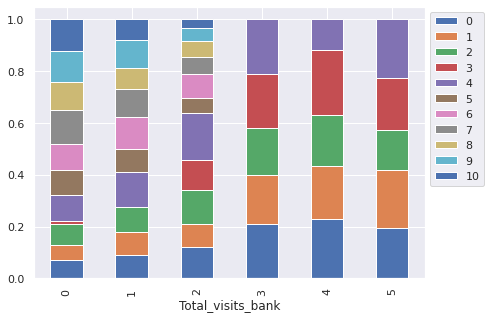

Total_calls_made      0   1   2   3    4   5   6   7   8   9  10  All
Total_visits_online                                                  
All                  97  90  91  83  108  29  39  35  30  32  26  660
2                    21  33  27  38   26   9   9   9   5   4   8  189
3                     0   0   0   0    7   5   7   9   5   3   8   44
4                     0   0   0   0   10   6  15  10  10  13   5   69
5                     0   0   0   0    6   9   8   6   9  11   5   54
11                    3   0   2   0    0   0   0   0   0   0   0    5
15                    4   3   3   0    0   0   0   0   0   0   0   10
14                    0   1   0   0    0   0   0   0   0   0   0    1
13                    3   0   2   0    0   0   0   0   0   0   0    5
12                    0   1   4   1    0   0   0   0   0   0   0    6
0                    30  26  27  26   35   0   0   0   0   0   0  144
10                    1   2   2   0    0   0   0   0   0   1   0    6
9                   

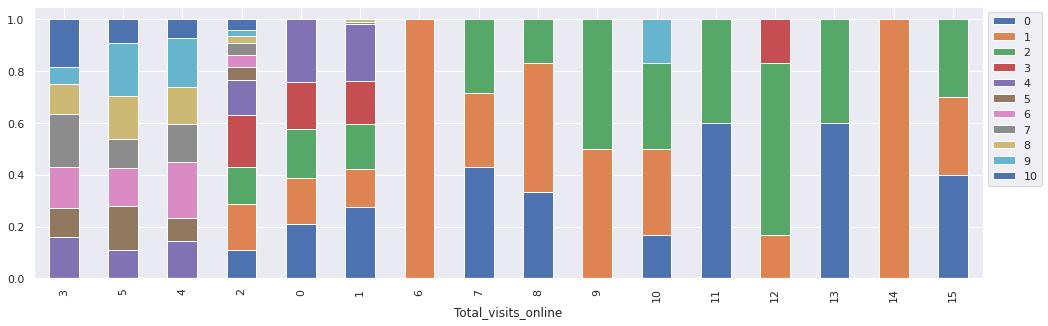

Total_calls_made   0   1   2   3    4   5   6   7   8   9  10  All
Total_calls_made                                                  
10                 0   0   0   0    0   0   0   0   0   0  26   26
All               97  90  91  83  108  29  39  35  30  32  26  660
0                 97   0   0   0    0   0   0   0   0   0   0   97
1                  0  90   0   0    0   0   0   0   0   0   0   90
2                  0   0  91   0    0   0   0   0   0   0   0   91
3                  0   0   0  83    0   0   0   0   0   0   0   83
4                  0   0   0   0  108   0   0   0   0   0   0  108
5                  0   0   0   0    0  29   0   0   0   0   0   29
6                  0   0   0   0    0   0  39   0   0   0   0   39
7                  0   0   0   0    0   0   0  35   0   0   0   35
8                  0   0   0   0    0   0   0   0  30   0   0   30
9                  0   0   0   0    0   0   0   0   0  32   0   32
--------------------------------------------------------------

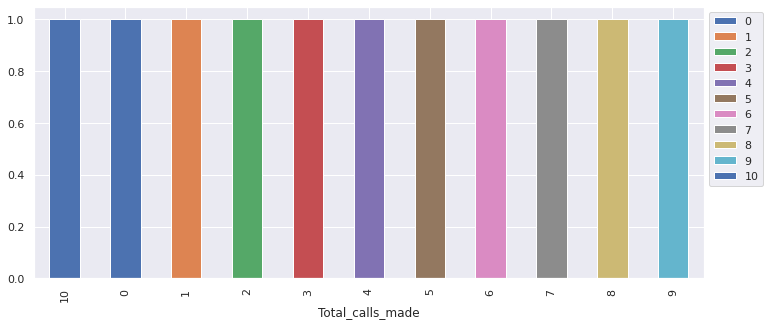

In [39]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Total_calls_made")

Total_calls_made     0   1   2   3    4   5   6   7   8   9  10  All
Total_Credit_Cards                                                  
All                 97  90  91  83  108  29  39  35  30  32  26  660
1                    0   0   0   0    6   8   7  12   7  10   9   59
2                    1   0   1   0   12   7  11   8  12   6   6   64
4                   23  22  21  19   23   6   8   9   7   7   6  151
3                    0   1   0   0    7   8  13   6   4   9   5   53
5                   13  14  15  14   18   0   0   0   0   0   0   74
6                   27  22  20  30   18   0   0   0   0   0   0  117
7                   20  18  19  20   24   0   0   0   0   0   0  101
8                    4   5   2   0    0   0   0   0   0   0   0   11
9                    3   2   6   0    0   0   0   0   0   0   0   11
10                   6   6   7   0    0   0   0   0   0   0   0   19
-------------------------------------------------------------------------------------------------------

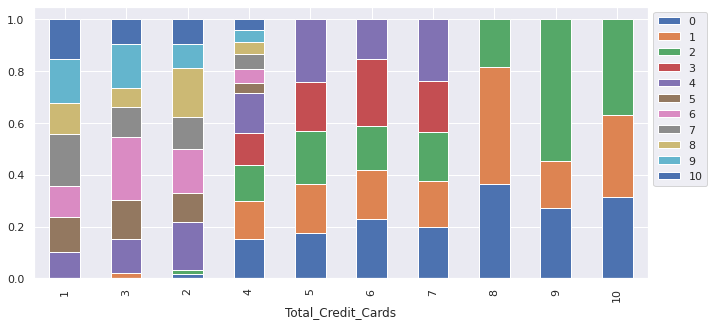

Total_calls_made    0   1   2   3    4   5   6   7   8   9  10  All
Total_visits_bank                                                  
All                97  90  91  83  108  29  39  35  30  32  26  660
0                   7   6   8   1   10  10  10  13  11  12  12  100
1                  10  10  11   0   15  10  14  12   9  12   9  112
2                  19  14  21  18   29   9  15  10  10   8   5  158
3                  21  19  18  21   21   0   0   0   0   0   0  100
4                  21  19  18  23   11   0   0   0   0   0   0   92
5                  19  22  15  20   22   0   0   0   0   0   0   98
------------------------------------------------------------------------------------------------------------------------


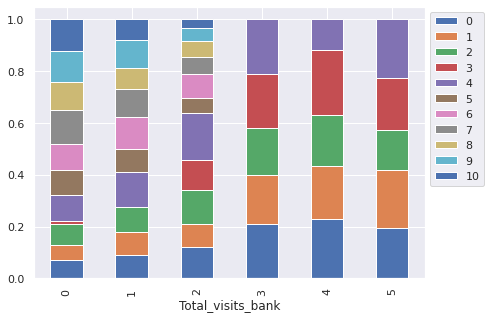

Total_calls_made      0   1   2   3    4   5   6   7   8   9  10  All
Total_visits_online                                                  
All                  97  90  91  83  108  29  39  35  30  32  26  660
2                    21  33  27  38   26   9   9   9   5   4   8  189
3                     0   0   0   0    7   5   7   9   5   3   8   44
4                     0   0   0   0   10   6  15  10  10  13   5   69
5                     0   0   0   0    6   9   8   6   9  11   5   54
11                    3   0   2   0    0   0   0   0   0   0   0    5
15                    4   3   3   0    0   0   0   0   0   0   0   10
14                    0   1   0   0    0   0   0   0   0   0   0    1
13                    3   0   2   0    0   0   0   0   0   0   0    5
12                    0   1   4   1    0   0   0   0   0   0   0    6
0                    30  26  27  26   35   0   0   0   0   0   0  144
10                    1   2   2   0    0   0   0   0   0   1   0    6
9                   

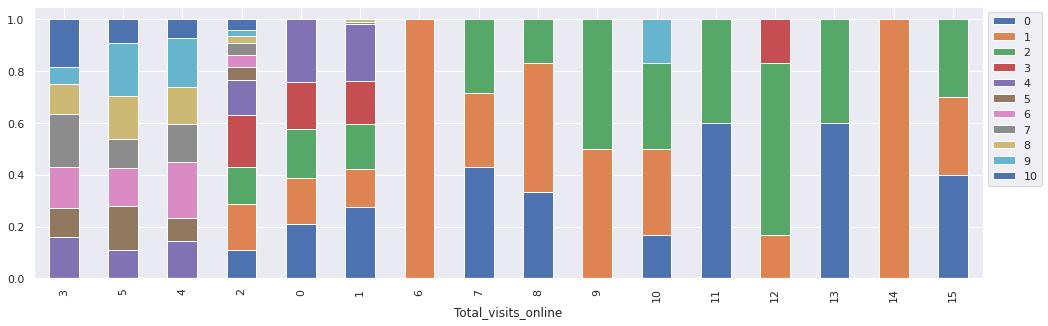

Total_calls_made   0   1   2   3    4   5   6   7   8   9  10  All
Total_calls_made                                                  
10                 0   0   0   0    0   0   0   0   0   0  26   26
All               97  90  91  83  108  29  39  35  30  32  26  660
0                 97   0   0   0    0   0   0   0   0   0   0   97
1                  0  90   0   0    0   0   0   0   0   0   0   90
2                  0   0  91   0    0   0   0   0   0   0   0   91
3                  0   0   0  83    0   0   0   0   0   0   0   83
4                  0   0   0   0  108   0   0   0   0   0   0  108
5                  0   0   0   0    0  29   0   0   0   0   0   29
6                  0   0   0   0    0   0  39   0   0   0   0   39
7                  0   0   0   0    0   0   0  35   0   0   0   35
8                  0   0   0   0    0   0   0   0  30   0   0   30
9                  0   0   0   0    0   0   0   0   0  32   0   32
--------------------------------------------------------------

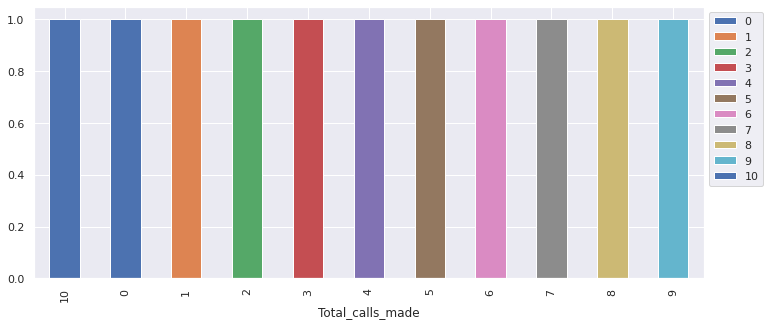

In [40]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Total_calls_made")

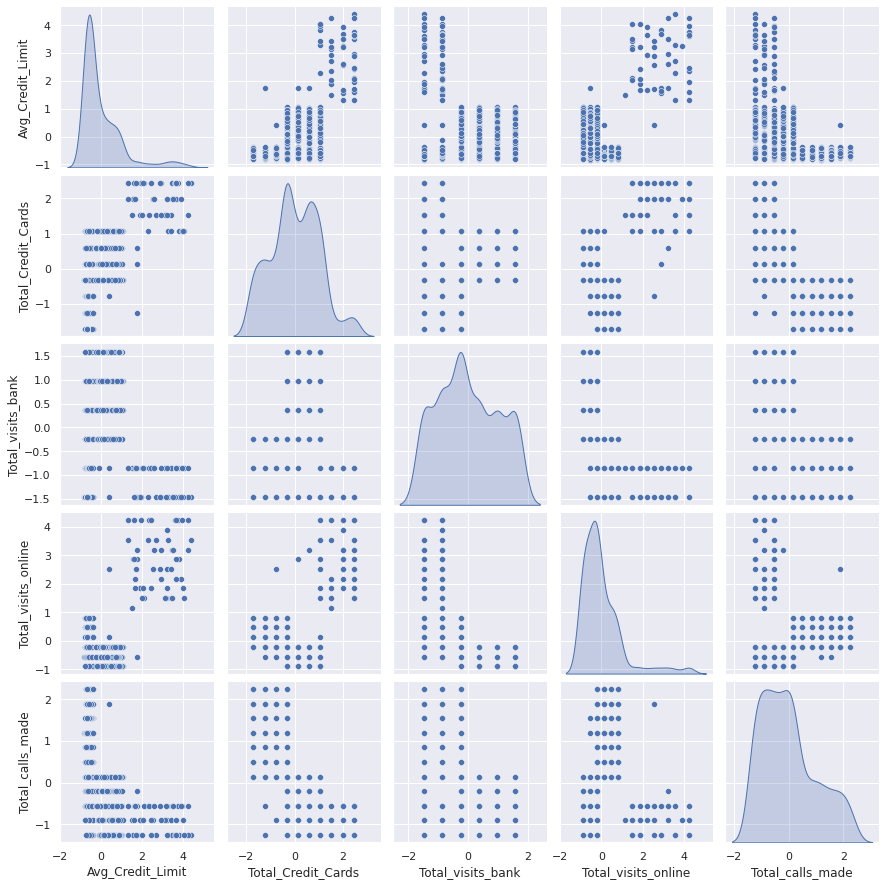

In [45]:
### Process the data 
# scale the data using standard

tmp_data_Scaled=tmp_data.apply(zscore)
sns.pairplot(tmp_data_Scaled,diag_kind='kde')

Text(0.5, 1.0, 'selecting k with the elbow method')

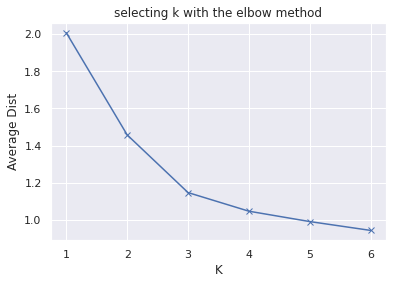

In [51]:
# Clustering with K-means 

# Plotting the elbow curve 

# group data into similar clusters

from scipy.spatial.distance import cdist
clusters = range(1,7)
meanDistortions =[]

for k in clusters: 
    model = KMeans(n_clusters=k)
    model.fit(tmp_data_Scaled)
    prediction=model.predict(tmp_data_Scaled)
    meanDistortions.append(sum(np.min(cdist(tmp_data_Scaled,model.cluster_centers_,"euclidean"),axis=1))/tmp_data_Scaled.shape[0])
    
    
plt.plot(clusters, meanDistortions,"bx-")
plt.xlabel('K')
plt.ylabel("Average Dist")
plt.title("selecting k with the elbow method")

In [54]:
# the elbow occurs when k = 3 
# profile the clusters when k = 3 

sil_score = []
cluster_list = range(2, 16)
for n_clusters in cluster_list:
  clusterer = KMeans(n_clusters=n_clusters, random_state=1)
  preds = clusterer.fit_predict((tmp_data_Scaled))
  score = silhouette_score(k_means_df, preds)
  sil_score.append(score)
  print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

NameError: ignored

Number of Clusters: 1 	Average Distortion: 1.7393478804552687
Number of Clusters: 2 	Average Distortion: 1.4435291664161356
Number of Clusters: 3 	Average Distortion: 0.9929786275844223
Number of Clusters: 4 	Average Distortion: 0.8831473638968211
Number of Clusters: 5 	Average Distortion: 0.8274914807196527
Number of Clusters: 6 	Average Distortion: 0.7805361036219811
Number of Clusters: 7 	Average Distortion: 0.7599862720908931
Number of Clusters: 8 	Average Distortion: 0.7281006906387077
Number of Clusters: 9 	Average Distortion: 0.6910399060292367
Number of Clusters: 10 	Average Distortion: 0.6636195343110178
Number of Clusters: 11 	Average Distortion: 0.6515426574409973
Number of Clusters: 12 	Average Distortion: 0.622923450580993
Number of Clusters: 13 	Average Distortion: 0.6052975414595418
Number of Clusters: 14 	Average Distortion: 0.5917609590632227
Number of Clusters: 15 	Average Distortion: 0.5757877357340745


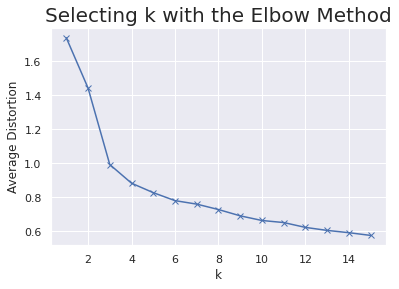

In [58]:
# scaling the data before clustering
scaler = StandardScaler()
subset_scaled_df = tmp_data.iloc[:, :-1].copy()
subset_scaled_df.iloc[:, :] = scaler.fit_transform(subset_scaled_df.iloc[:, :])
subset_scaled_df.head()

 

# creating a copy of the scaled dataframe

k_means_df = subset_scaled_df.copy()

 

# elbow plot

clusters = range(1, 16)
meanDistortions = []

for k in clusters:
  model = KMeans(n_clusters=k, random_state=1)
  model.fit(subset_scaled_df)
  prediction = model.predict(k_means_df)
  distortion = (
  sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
  / k_means_df.shape[0]
  )

  meanDistortions.append(distortion)

  print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

For n_clusters = 2, the silhouette score is 0.3703489704123042)
For n_clusters = 3, the silhouette score is 0.49041615658279514)
For n_clusters = 4, the silhouette score is 0.3822188027776342)
For n_clusters = 5, the silhouette score is 0.21005298926979948)
For n_clusters = 6, the silhouette score is 0.20518134409475078)
For n_clusters = 7, the silhouette score is 0.20062908389572706)
For n_clusters = 8, the silhouette score is 0.21263110260659432)
For n_clusters = 9, the silhouette score is 0.1890105418436997)
For n_clusters = 10, the silhouette score is 0.19465433283555775)
For n_clusters = 11, the silhouette score is 0.13445159530863682)
For n_clusters = 12, the silhouette score is 0.15295705844136825)
For n_clusters = 13, the silhouette score is 0.15146761622761576)
For n_clusters = 14, the silhouette score is 0.1631601400845131)
For n_clusters = 15, the silhouette score is 0.15949757460852013)


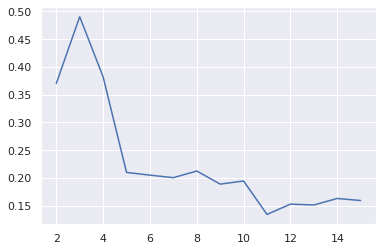

In [61]:

sil_score = []
cluster_list = range(2, 16)
for n_clusters in cluster_list:
  clusterer = KMeans(n_clusters=n_clusters, random_state=1)
  preds = clusterer.fit_predict((tmp_data_Scaled))
  score = silhouette_score(k_means_df, preds)
  sil_score.append(score)
  print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

In [65]:
# fitting K-means model

kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(k_means_df)

 

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_

#df2 = df.copy()
tmp_data["KM_segments"] = kmeans.labels_

 

# cluster profiling

km_cluster_profile = tmp_data.groupby("KM_segments").mean()

km_cluster_profile["count_in_each_segment"] = (
tmp_data.groupby("KM_segments")["Total_Credit_Cards"].count().values
)

km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
KM_segments,,,,,,
0,12722.943723,2.454545,0.956710,3.493506,6.714286,231
1,33846.965699,5.546174,3.522427,0.970976,2.005277,379
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
